In [58]:
import numpy as np
import pandas as pd

In [59]:
df=pd.read_csv("/home/flockwits/Downloads/Sample_Dataset.csv")
df

,Sno,Location,Browser,status,address,state,language
0,0,Chennai,Safari,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"
1,1,Coimbatore,Safari,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"
2,2,Mumbai,Chrome,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"
3,3,Bangalore,Firefox,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"
4,4,Salem,Chrome,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"
5,5,Madurai,Internet Explorer,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"
6,6,Mumbai,Chrome,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"
7,7,Mumbai,Firefox,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"
8,8,Coimbatore,Firefox,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"
9,9,Chennai,Safari,keep-alive,http://192.168.0.101:8000,"gzip, deflate","en-GB,en-US;q=0.9,en;q=0.8"


In [60]:
df.drop(['status','address','state','language'],axis=1,inplace=True)

In [50]:
df

,Sno,Location,Browser
0,0,Chennai,Safari
1,1,Coimbatore,Safari
2,2,Mumbai,Chrome
3,3,Bangalore,Firefox
4,4,Salem,Chrome
5,5,Madurai,Internet Explorer
6,6,Mumbai,Chrome
7,7,Mumbai,Firefox
8,8,Coimbatore,Firefox
9,9,Chennai,Safari


In [46]:
def ch_location(x):
     if x=='Chennai':
        return 0
     if x=='Coimbatore':
        return 1
     if x=='Mumbai':
        return 2
     if x=='Bangalore':
        return 3
     if x=='Salem':
        return 4
     if x=='Madurai':
        return 5

In [12]:
df['trans_location']=df['Location'].apply(ch_location)
df

,Sno,Location,Browser,trans_location
0,0,Chennai,Safari,0
1,1,Coimbatore,Safari,1
2,2,Mumbai,Chrome,2
3,3,Bangalore,Firefox,3
4,4,Salem,Chrome,4
5,5,Madurai,Internet Explorer,5
6,6,Mumbai,Chrome,2
7,7,Mumbai,Firefox,2
8,8,Coimbatore,Firefox,1
9,9,Chennai,Safari,0


In [13]:
def co_browser(x):
     if x=='Safari':
        return 7
     if x=='Chrome':
        return 8
     if x=='Firefox':
        return 9
     if x=='Internet Explorer':
        return 10
     

In [14]:
df['trans_browser']=df['Browser'].apply(co_browser)
df

,Sno,Location,Browser,trans_location,trans_browser
0,0,Chennai,Safari,0,7
1,1,Coimbatore,Safari,1,7
2,2,Mumbai,Chrome,2,8
3,3,Bangalore,Firefox,3,9
4,4,Salem,Chrome,4,8
5,5,Madurai,Internet Explorer,5,10
6,6,Mumbai,Chrome,2,8
7,7,Mumbai,Firefox,2,9
8,8,Coimbatore,Firefox,1,9
9,9,Chennai,Safari,0,7


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

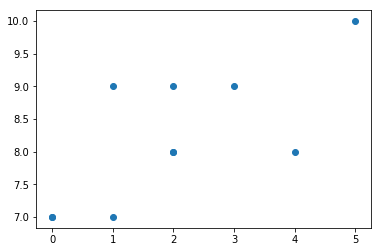

In [21]:
plt.scatter(df['trans_location'],df['trans_browser'])

In [37]:
km=KMeans(n_clusters=4)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
predict_y=km.fit_predict(df[['trans_location','trans_browser']])
predict_y

array([2, 2, 0, 1, 1, 3, 0, 0, 0, 2], dtype=int32)

In [39]:
df['cluster']=predict_y
df

,Sno,Location,Browser,trans_location,trans_browser,cluster
0,0,Chennai,Safari,0,7,2
1,1,Coimbatore,Safari,1,7,2
2,2,Mumbai,Chrome,2,8,0
3,3,Bangalore,Firefox,3,9,1
4,4,Salem,Chrome,4,8,1
5,5,Madurai,Internet Explorer,5,10,3
6,6,Mumbai,Chrome,2,8,0
7,7,Mumbai,Firefox,2,9,0
8,8,Coimbatore,Firefox,1,9,0
9,9,Chennai,Safari,0,7,2


In [40]:
df.drop(['trans_location'],['ta'])

,Sno,Location,Browser,trans_location,trans_browser,cluster
0,0,Chennai,Safari,0,7,2
1,1,Coimbatore,Safari,1,7,2
2,2,Mumbai,Chrome,2,8,0
3,3,Bangalore,Firefox,3,9,1
4,4,Salem,Chrome,4,8,1
5,5,Madurai,Internet Explorer,5,10,3
6,6,Mumbai,Chrome,2,8,0
7,7,Mumbai,Firefox,2,9,0
8,8,Coimbatore,Firefox,1,9,0
9,9,Chennai,Safari,0,7,2


In [61]:
df

,Sno,Location,Browser
0,0,Chennai,Safari
1,1,Coimbatore,Safari
2,2,Mumbai,Chrome
3,3,Bangalore,Firefox
4,4,Salem,Chrome
5,5,Madurai,Internet Explorer
6,6,Mumbai,Chrome
7,7,Mumbai,Firefox
8,8,Coimbatore,Firefox
9,9,Chennai,Safari


In [70]:
dummies1=pd.get_dummies(df.Location)
dummies1

,Bangalore,Chennai,Coimbatore,Madurai,Mumbai,Salem
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0
6,0,0,0,0,1,0
7,0,0,0,0,1,0
8,0,0,1,0,0,0
9,0,1,0,0,0,0


In [71]:
dummies2=pd.get_dummies(df.Browser)
dummies2

,Chrome,Firefox,Internet Explorer,Safari
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
5,0,0,1,0
6,1,0,0,0
7,0,1,0,0
8,0,1,0,0
9,0,0,0,1


In [72]:
merged=pd.concat([df,dummies1,dummies2],axis='columns')
merged

,Location,Browser,Bangalore,Chennai,Coimbatore,Madurai,Mumbai,Salem,Chrome,Firefox,Internet Explorer,Safari
0,Chennai,Safari,0,1,0,0,0,0,0,0,0,1
1,Coimbatore,Safari,0,0,1,0,0,0,0,0,0,1
2,Mumbai,Chrome,0,0,0,0,1,0,1,0,0,0
3,Bangalore,Firefox,1,0,0,0,0,0,0,1,0,0
4,Salem,Chrome,0,0,0,0,0,1,1,0,0,0
5,Madurai,Internet Explorer,0,0,0,1,0,0,0,0,1,0
6,Mumbai,Chrome,0,0,0,0,1,0,1,0,0,0
7,Mumbai,Firefox,0,0,0,0,1,0,0,1,0,0
8,Coimbatore,Firefox,0,0,1,0,0,0,0,1,0,0
9,Chennai,Safari,0,1,0,0,0,0,0,0,0,1


In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [89]:
km=KMeans(n_clusters=6)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
predict_y=km.fit_predict(merged[['Bangalore','Chennai','Coimbatore','Madurai','Mumbai','Salem']])
predict_y

array([5, 2, 1, 4, 0, 3, 1, 1, 2, 5], dtype=int32)